Text(0.5, 0, 'ω(rad/s)')

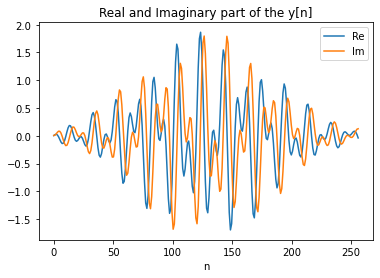

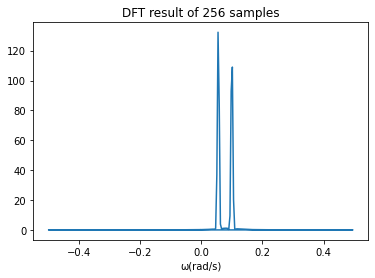

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import IPython.display
import scipy.signal as sp
import random
import math

#Meros 1o: Fasmatikh analish
#1.1

j=complex(0,1)
w=np.hamming(256)   #parathiro Hamming 256 deigmatwn 
A1=1
A2=0.9
w1=np.pi/9  #sixnotites gia x1[n] kai x2[n] 
w2=np.pi/5

#tixaies faseis metaksi [0,2pi]---dimiourgw random numbers metaksi [0,1] kai pollaplasiazw me 2pi
ph1=random.random() *2*np.pi
ph2=random.random() *2*np.pi

n=np.linspace(0,256,256)    #pedio xronou

y=[]
for i in range (256):
    y0=w[i]*(A1*np.exp(complex(j)*(w1*i+ph1)) + A2*np.exp(complex(j)*(w2*i+ph2)))
    y=np.append(y,y0)

plt.figure(0)
plt.title('Real and Imaginary part of the y[n]')
plt.plot(n,y.real,n,y.imag)
plt.xlabel('n')
plt.legend(['Re','Im'])

y= np.fft.fft(y)
freq= np.fft.fftfreq(n.shape[-1])  #pedio sixnotitas
plt.figure(1)
plt.title('DFT result of 256 samples')
plt.plot(freq,np.abs(y))
plt.xlabel('ω(rad/s)')



0.5235987755982988
0.4487989505128276
0.39269908169872414
0.397
0.382


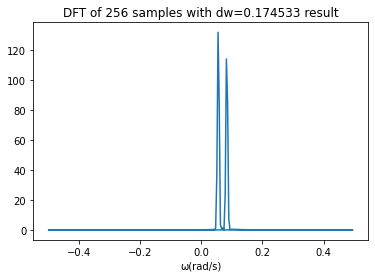

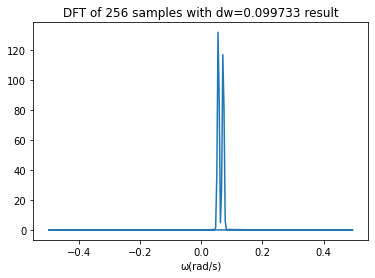

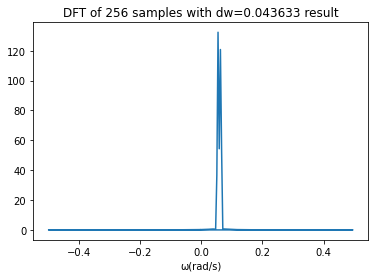

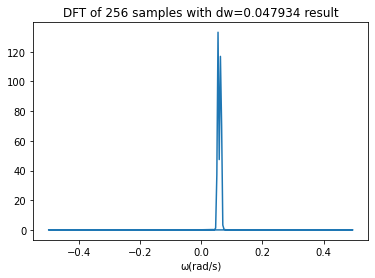

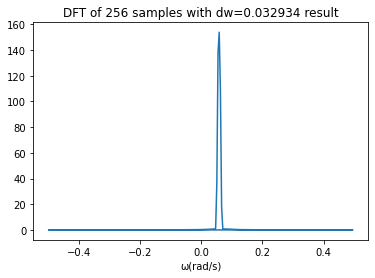

In [2]:
#metakinish me mikra vimata tis sixnotitas w2 pros tin w1
w2=[np.pi/6,np.pi/7, np.pi/8, 0.397,0.382] #diafores times gia tin w2 gia na eksetasoume tin diakritikh ikanotita tou simatos
freq= np.fft.fftfreq(n.shape[-1])
counter=0
for k in w2:                                       #pairnei tis diafores times apo ton pinaka w2[]
    print(k)
    dw=np.abs(w1-k)                                #parametros dw=|w1-w2|
    y=[]
    for i in range (256):                          #DFT 256 deigmatwn
        y0=w[i]*(A1*np.exp(complex(j)*((np.pi/9)*i+ph1)) + A2*np.exp(complex(j)*(k*i+ph2)) )
        y=np.append(y,y0)
    y= np.fft.fft(y)
    plt.figure(counter)
    plt.title('DFT of 256 samples with dw=%1.6f result' %dw)
    plt.plot(freq,np.abs(y))
    plt.xlabel('ω(rad/s)')
    dw=np.abs(w1-k)
    counter+=1

0.6283185307179586
0.5235987755982988
0.397
0.3889


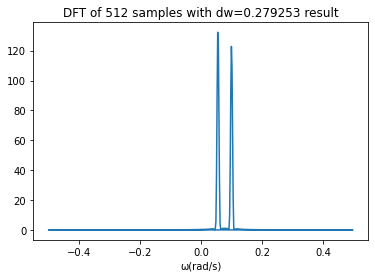

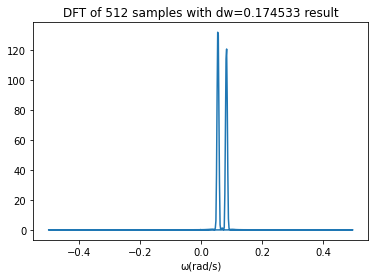

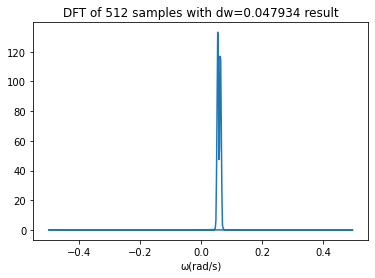

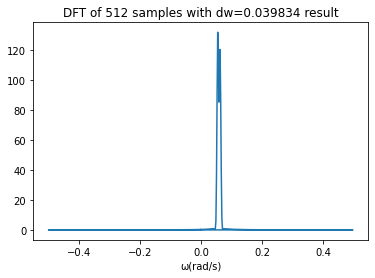

In [3]:
#erwtima 1.2 DFT me N=512 kai N=1024 deigmata

# a| DFT me N=512 deigmata------------------xaraktiristika simatos idia
w2=[np.pi/5, np.pi/6, 0.397,0.3889] #diafores times gia tin w2 gia na eksetasoume tin diakritikh ikanotita tou simatos
n=np.linspace(0,2*np.pi,512)      #pedio xronou N=512
freq= np.fft.fftfreq(n.shape[-1]) #pedio sixnotitas
z=np.zeros(256)       #dimiourgw ena pinaka 256 midenikwn gia to zero-padding
counter=0
for k in w2:                                       #pairnei tis diafores times sixnotitwn apo ton pinaka w2[]
    print(k)
    dw=np.abs(w1-k)                                #parametros dw=|w1-w2|
    y512=[]
    for i in range (256):                          #mikos simatos paramenei to idio L=256
        y0=w[i]*(A1*np.exp(complex(j)*((np.pi/9)*i+ph1)) + A2*np.exp(complex(j)*(k*i+ph2)) )
        y512=np.append(y512,y0)
    y512=np.append(y512,z)
    y512= np.fft.fft(y512)
    plt.figure(counter)
    plt.title('DFT of 512 samples with dw=%1.6f result' %dw)
    plt.plot(freq,np.abs(y512))
    plt.xlabel('ω(rad/s)')
    dw=np.abs(w1-k)
    counter+=1

0.6283185307179586
0.5235987755982988
0.397
0.385
0.379
0.378


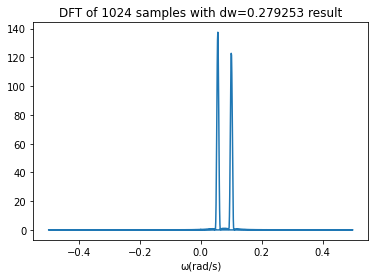

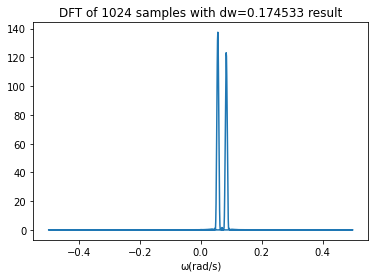

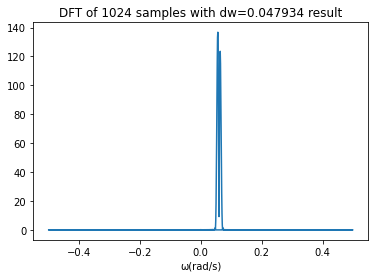

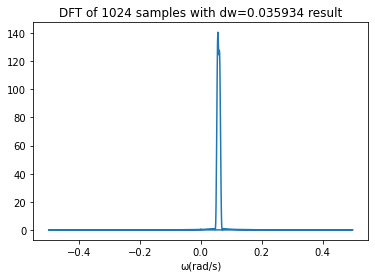

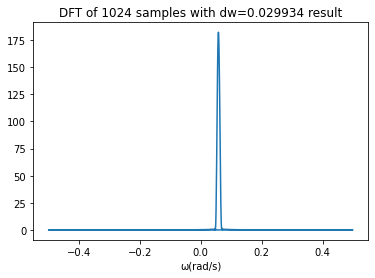

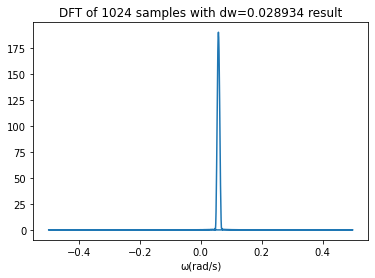

In [4]:
#b| DFT me N=1024------------------xaraktiristika simatos idia
w2=[np.pi/5, np.pi/6, 0.397, 0.385,0.379, 0.378] #diafores times gia tin w2 gia na eksetasoume tin diakritikh ikanotita tou simatos
n=np.linspace(0,2*np.pi,1024)      #pedio xronou N=1024
freq= np.fft.fftfreq(n.shape[-1]) #pedio sixnotitas
z=np.zeros(768)       #dimiourgw ena pinaka 1024 midenikwn gia to zero-padding
counter=0
for k in w2:                                       #pairnei tis diafores times apo ton pinaka w2[]
    print(k)
    dw=np.abs(w1-k)    #parametros dw=|w1-w2|
    y1024=[]
    for i in range (256):                          #mikos simatos paramenei to idio L=1024
        y0=w[i]*(A1*np.exp(complex(j)*((np.pi/9)*i+ph1)) + A2*np.exp(complex(j)*(k*i+ph2)))
        y1024=np.append(y1024,y0)
    y1024=np.append(y1024,z)
    y1024= np.fft.fft(y1024)
    plt.figure(counter)
    plt.title('DFT of 1024 samples with dw=%1.6f result' %dw)
    plt.plot(freq,np.abs(y1024))
    plt.xlabel('ω(rad/s)')
    dw=np.abs(w1-k)
    counter+=1

0.6283185307179586
0.5235987755982988
0.397
0.385
0.379
0.378


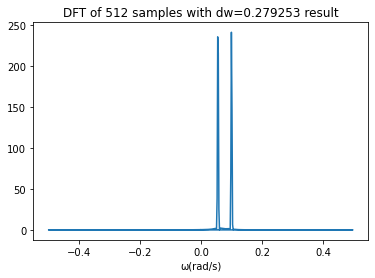

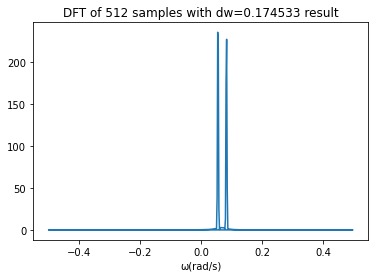

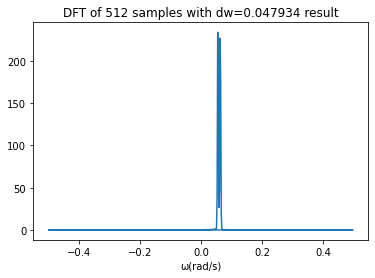

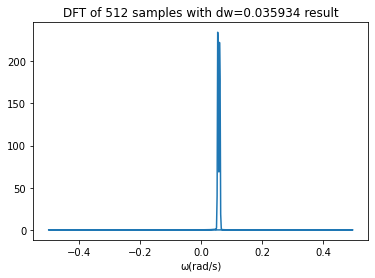

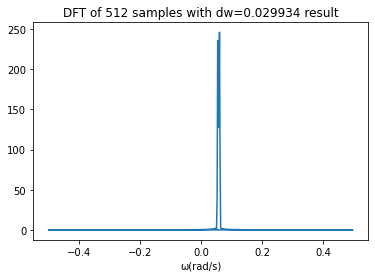

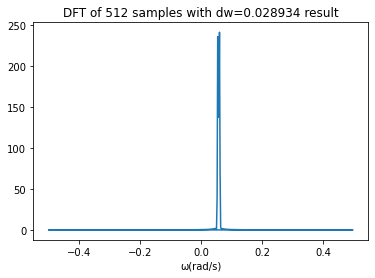

In [5]:
#erotima 1.3
#N=512
w2=[np.pi/5, np.pi/6, 0.397, 0.385,0.379, 0.378] #diafores times gia tin w2 gia na eksetasoume tin diakritikh ikanotita tou simatos
n=np.linspace(0,2*np.pi,512)                     #pedio xronou N=512
freq= np.fft.fftfreq(n.shape[-1])                #pedio sixnotitas
w=np.hamming(512)
counter=0
for k in w2:                                     #pairnei tis diafores times apo ton pinaka w2[]
    print(k)
    dw=np.abs(w1-k)                              #parametros dw=|w1-w2|
    y13a=[]
    for i in range (512):                        #DFT 512 deigmaton            
        y0=w[i]*(A1*np.exp(complex(j)*((np.pi/9)*i+ph1)) + A2*np.exp(complex(j)*(k*i+ph2)))
        y13a=np.append(y13a,y0)
    y13a= np.fft.fft(y13a)
    plt.figure(counter)
    plt.title('DFT of 512 samples with dw=%1.6f result' %dw)
    plt.plot(freq,np.abs(y13a))
    plt.xlabel('ω(rad/s)')
    dw=np.abs(w1-k)
    counter+=1

0.6283185307179586
0.5235987755982988
0.397
0.385
0.383
0.36
0.355


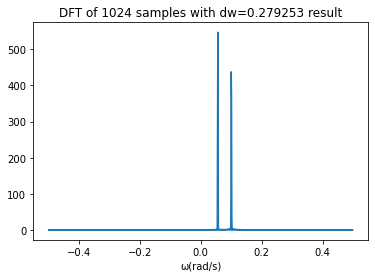

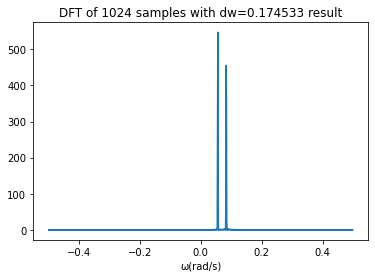

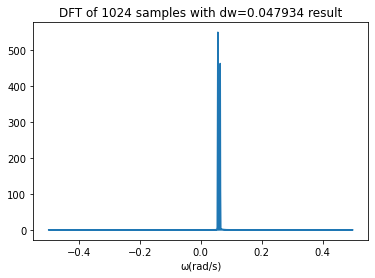

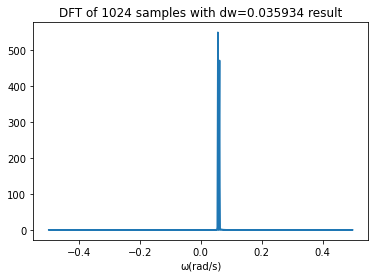

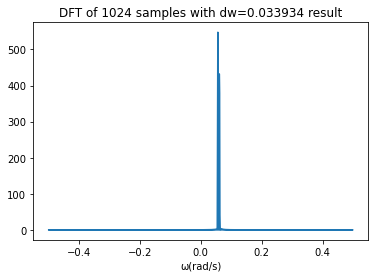

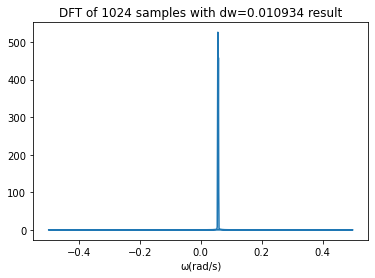

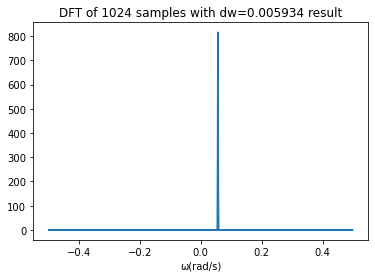

In [6]:
#N=1024
w2=[np.pi/5, np.pi/6, 0.397, 0.385,0.383, 0.36,0.355] #diafores times gia tin w2 gia na eksetasoume tin diakritikh ikanotita tou simatos
n=np.linspace(0,2*np.pi,1024)                    #pedio xronou N=1024
freq= np.fft.fftfreq(n.shape[-1])                #pedio sixnotitas
w=np.hamming(1024)
counter=0
for k in w2:                                     #pairnei tis diafores times apo ton pinaka w2[]
    print(k)
    dw=np.abs(w1-k)                               #parametros dw=|w1-w2|
    y13b=[]
    for i in range (1024):                        #DFT 1024 deigmaton            
        y0=w[i]*(A1*np.exp(complex(j)*((np.pi/9)*i+ph1)) + A2*np.exp(complex(j)*(k*i+ph2)))
        y13b=np.append(y13b,y0)
    y13b= np.fft.fft(y13b)
    plt.figure(counter)
    plt.title('DFT of 1024 samples with dw=%1.6f result' %dw)
    plt.plot(freq,np.abs(y13b))
    plt.xlabel('ω(rad/s)')
    dw=np.abs(w1-k)
    counter+=1

Text(0.5, 0, 'ω(rad/s)')

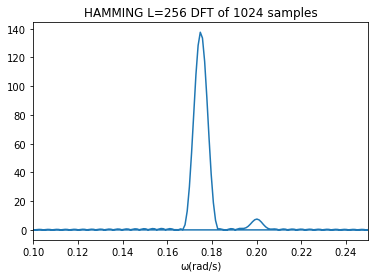

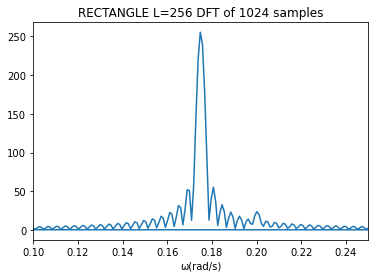

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import IPython.display
import scipy.signal 
import random
import math

j=complex(0,1)
z=np.zeros(768)               #gia to zero-padding
A1=1
A2=0.05
w1=0.35*np.pi #sixnotites gia x1[n] kai x2[n] 
w2=0.4*np.pi
#tixaies faseis metaksi [0,2pi]---dimiourgw random numbers metaksi [0,1] kai pollaplasiazw me 2pi
ph1=random.random() *2*np.pi
ph2=random.random() *2*np.pi

w=np.hamming(256)   #parathiro Hamming 256 deigmatwn 
yhamming=[]
for i in range (256):
    y0=w[i]*(A1*np.exp(complex(j)*(w1*i+ph1)) + A2*np.exp(complex(j)*(w2*i+ph2)))
    yhamming=np.append(yhamming,y0)
ysquare=[]
for k in range(256):
    y1=A1*np.exp(complex(j)*(w1*k+ph1)) + A2*np.exp(complex(j)*(w2*k+ph2))
    ysquare=np.append(ysquare,y1)

yhamming=np.append(yhamming,z)                           #zero-padding
ysquare=np.append(ysquare,z)
n=np.linspace(-np.pi,np.pi,1024)     #pedio xronou
freq=np.fft.fftfreq(n.shape[-1]) #pedio sixnotitas
yw=np.fft.fft(yhamming)
ywsquare=np.fft.fft(ysquare)

plt.figure(0)
plt.title('HAMMING L=256 DFT of 1024 samples')
plt.plot(freq,np.abs(yw))
plt.xlim(0.1, 0.250)
plt.xlabel('ω(rad/s)')

plt.figure(1)
plt.title('RECTANGLE L=256 DFT of 1024 samples')
plt.plot(freq,np.abs(ywsquare))
plt.xlim(0.1, 0.250)
plt.xlabel('ω(rad/s)')
